libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import json
from datetime import datetime

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB, MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from tensorflow import keras

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
# In literature, it has been said that you can use F1-score for binary classification of imbalanced datasets 
# since precision and recall metrics will play an important role. 
# If there is no imbalance in dataset, ROC curves will give better insights.

from scipy.stats import kendalltau, spearmanr

from tqdm.auto import tqdm

In [2]:
raw_data = pd.read_excel('archive\marketing_campaign.xlsx')

In [3]:
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
raw_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# Checking whether the target is imbalanced or not

raw_data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [6]:
# Checking missing values

raw_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Checking distribution of missing values on target

raw_data[raw_data['Income'].isna() == True]['Response'].value_counts()

0    23
1     1
Name: Response, dtype: int64

In [8]:
# Dropping missing values

raw_data = raw_data.dropna()
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [10]:
raw_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
raw_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


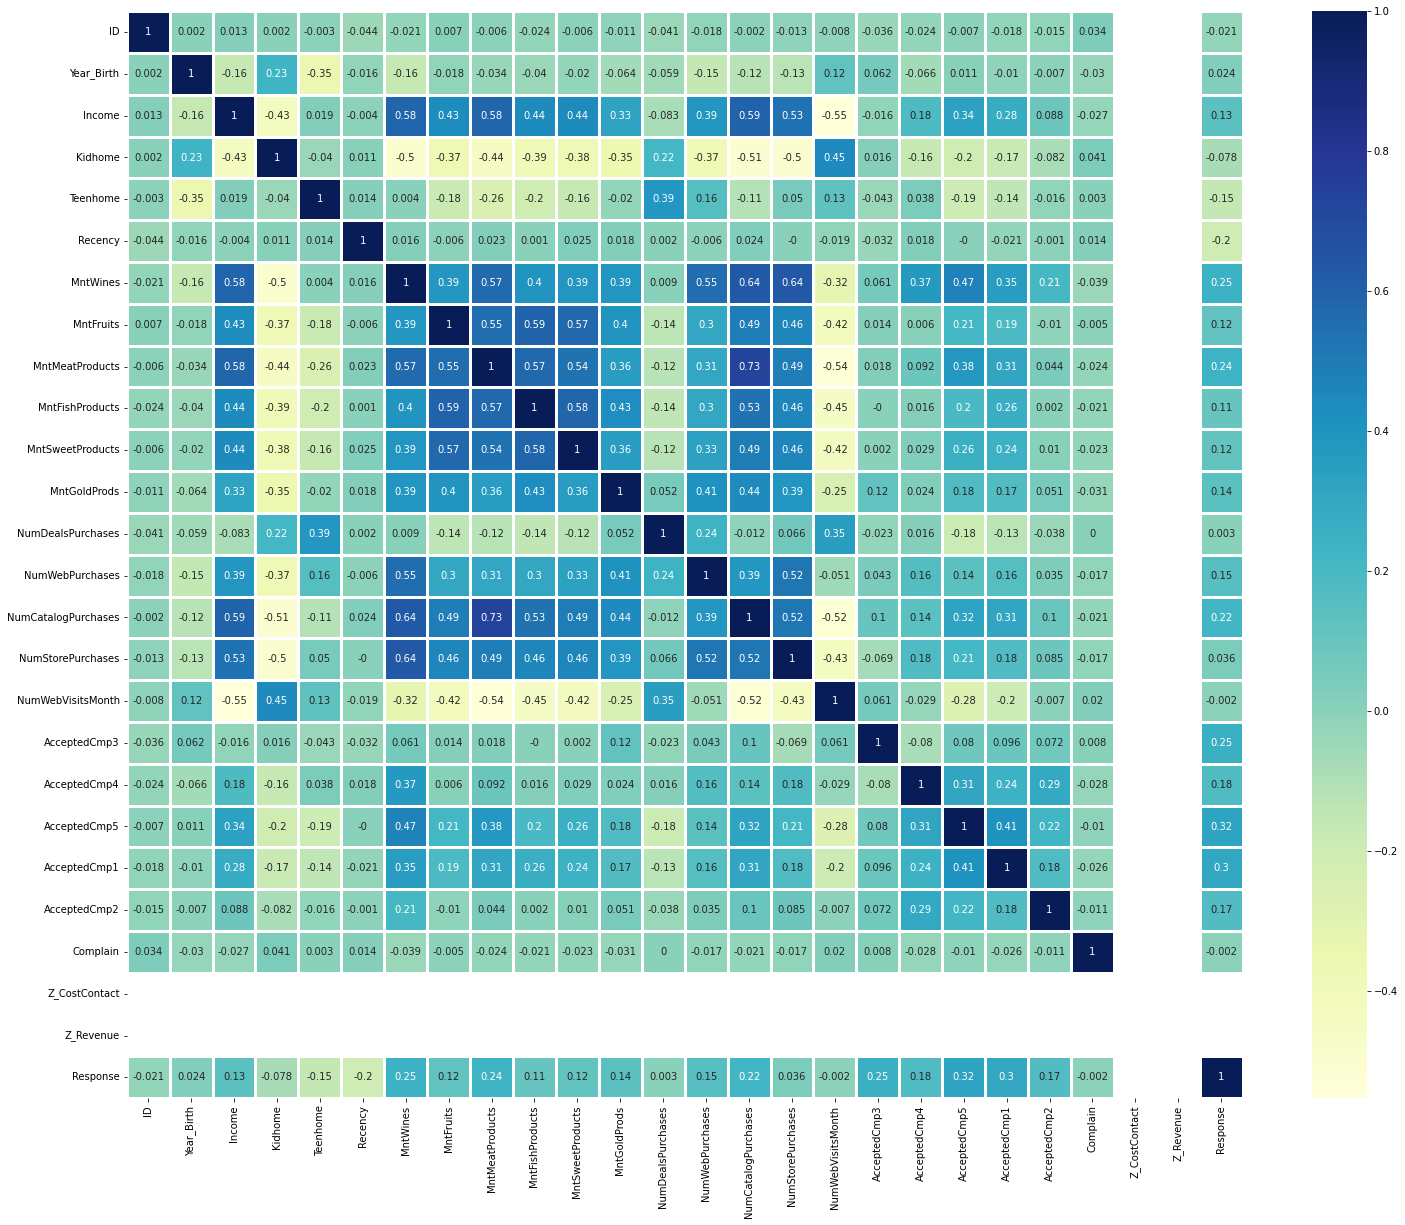

In [12]:
# Analyzing correlation matrix to find insights. Thus, we could make some feature engineering, like aggregating, dropping, etc. 

corrmat = raw_data.corr().round(3)
fig, ax = plt.subplots(figsize = (25,20))
sns.heatmap(data = corrmat, annot=True, linewidths=3, cmap="YlGnBu");

In [13]:
# # Analyzing mutual scatter plots to understand their distribution similarities.

# for item in raw_data.columns:
#     corr_data = pd.concat([raw_data['Response'], raw_data[item]], axis = 1)
#     corr_data.plot.scatter(x=item, y='Response')

In [14]:
# # Analyzing mutual pairplots to understand their distribution similarities.

# sns.pairplot(raw_data[raw_data.columns], hue='Response', size = 8)

In [15]:
# # Analyzing mutual pairplots to understand their distribution similarities.

# sns.pairplot(raw_data[raw_data.columns], size = 8)

![pairplot](pairplot.png "pairplot")

![pairplot_with_hue](pairplot_with_hue.png "pairplot_with_hue")

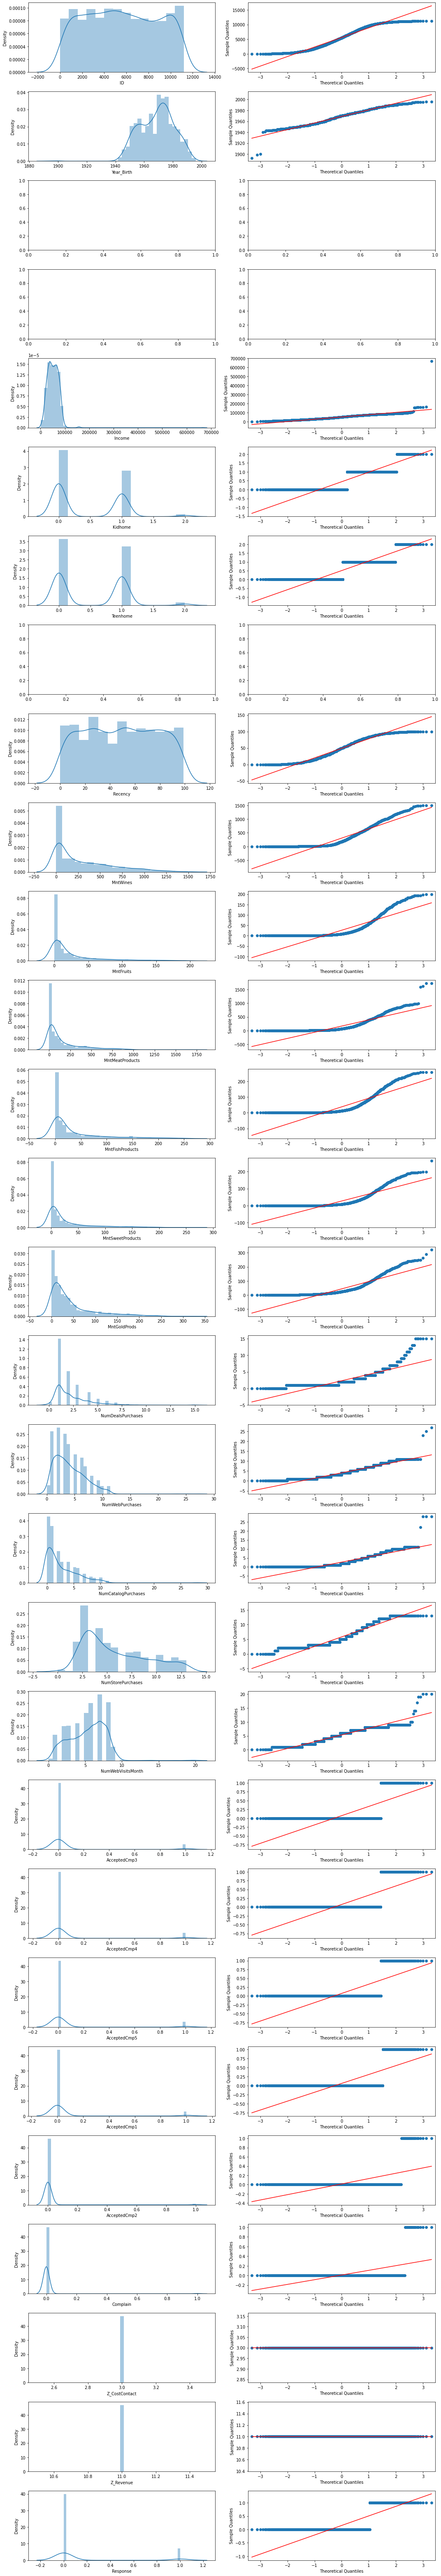

In [16]:
# Applying the visual normality tests for outlier detection
# Normal distribution --> use std dev to detect outliers
# Skewed distribution --> use IQR to detect outliers

from statsmodels.graphics.gofplots import qqplot

fig,axes = plt.subplots(nrows = len(raw_data.columns), ncols = 2, figsize=(15,3*len(raw_data.columns)))
for x,y in enumerate(raw_data.columns):
        if raw_data[y].dtype == 'object':
                continue
        else:
                sns.distplot(raw_data[y], ax = axes[x, 0], label = y)
                qqplot(raw_data[y], line ='s', ax = axes[x, 1]);

fig.tight_layout()

# Feature Engineering

In [17]:
# Check --> results.xlsx

In [18]:
raw_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
raw_data.drop([
                'ID',
                'Z_CostContact',
                'Z_Revenue'
                ], 
                axis = 1, 
                inplace=True)

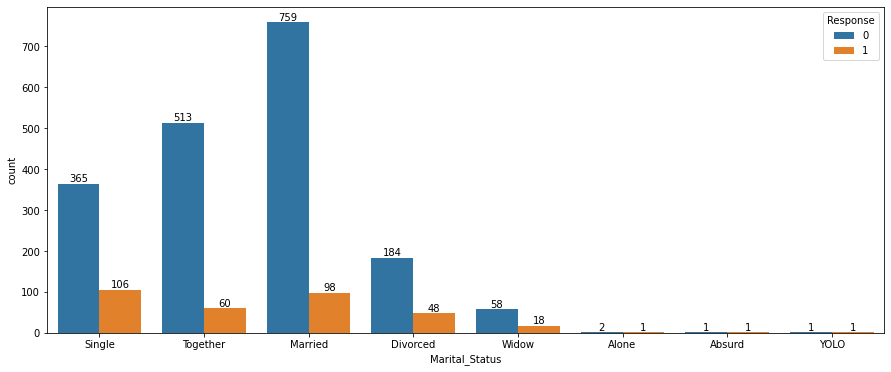

In [20]:
# Marital Status Countplot

fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(
            x = 'Marital_Status', 
            hue = 'Response',
            data = raw_data
            )
for container in ax.containers:
    ax.bar_label(container)
plt.show();

# # Marital Status Percentage plot

# fig, ax = plt.subplots(figsize=(15,6))
# sns.histplot(
#             x = raw_data['Marital_Status'], 
#             hue = raw_data['Response'], 
#             multiple = 'dodge', 
#             stat = 'percent', 
#             shrink = 0.8
#             )
# plt.show();

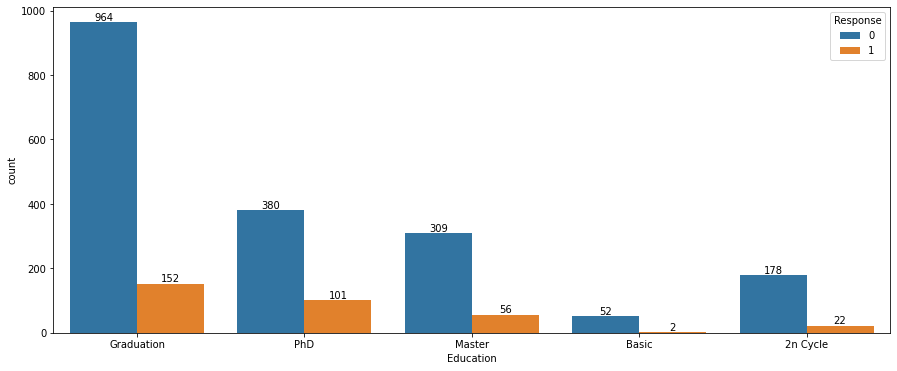

In [21]:
# Education Status Countplot

fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(
            x = 'Education', 
            hue = 'Response',
            data = raw_data
            )
for container in ax.containers:
    ax.bar_label(container)
plt.show();

In [22]:
# # Income Categories Countplot

# raw_data.loc[:,'Income'][raw_data['Income'] < 15000] = 1
# raw_data.loc[:,'Income'][(raw_data['Income'] >= 15000) & (raw_data['Income'] < 30000)] = 2
# raw_data.loc[:,'Income'][(raw_data['Income'] >= 30000) & (raw_data['Income'] < 45000)] = 3
# raw_data.loc[:,'Income'][(raw_data['Income'] >= 45000) & (raw_data['Income'] < 60000)] = 4
# raw_data.loc[:,'Income'][(raw_data['Income'] >= 60000) & (raw_data['Income'] < 75000)] = 5
# raw_data.loc[:,'Income'][(raw_data['Income'] >= 75000) & (raw_data['Income'] < 90000)] = 6
# raw_data.loc[:,'Income'][raw_data['Income'] >= 90000] = 7

# fig, ax = plt.subplots(figsize=(15,6))
# sns.countplot(
#             x = 'Income', 
#             hue = 'Response',
#             data = raw_data
#             )
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show();

In [23]:
today = datetime.now()

raw_data['age'] = today.year - raw_data['Year_Birth'] # Calculating age instead of year of birth
raw_data.drop(['Year_Birth'], axis = 1, inplace=True)

raw_data['Dt_Customer'] = pd.to_datetime(raw_data['Dt_Customer'])
raw_data['Dt_Customer'] = ((today - raw_data['Dt_Customer'])/np.timedelta64(1, 'M')).astype(int) # calculating months between registration date and today

raw_data['PurchasesSum'] = raw_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1)
raw_data.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], axis = 1, inplace=True)

raw_data['KidsSum'] = raw_data[['Kidhome', 'Teenhome']].sum(axis = 1)
raw_data.drop(['Kidhome', 'Teenhome'], axis = 1, inplace=True)

raw_data['MntSum'] = raw_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 1)
raw_data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace=True)

raw_data['Marital_Status'][raw_data['Marital_Status'] == 'Married'] = 'Together'
raw_data['Marital_Status'][raw_data['Marital_Status'] == 'Divorced'] = 'Single'
raw_data['Marital_Status'][raw_data['Marital_Status'] == 'Widow'] = 'Single'
raw_data['Marital_Status'][raw_data['Marital_Status'] == 'Alone'] = 'Single'
raw_data['Marital_Status'][raw_data['Marital_Status'] == 'Absurd'] = 'Together'
raw_data['Marital_Status'][raw_data['Marital_Status'] == 'YOLO'] = 'Single'

In [24]:
raw_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'PurchasesSum',
       'KidsSum', 'MntSum'],
      dtype='object')

In [25]:
# Non-Linear Correlations

In [26]:
# Spearman

alpha = 0.05
spearmanr_corr = []
spearmanr_noncorr = []
spearmanr_dict = {}

for item in raw_data.columns:
	coef, p = spearmanr(raw_data['Response'], raw_data[item])
	print(f'{item} Spearmans correlation coefficient: {coef:.5f}, p_value = {p:.6f}')

	if p > alpha: 	# interpret the significance
		print(f'{item} and consumption are uncorrelated (fail to reject H0) p=%.3f' % p)
		spearmanr_noncorr.append(item)
	else:
		print(f'{item} and consumption are correlated (reject H0) p=%.3f' % p)
		spearmanr_corr.append(item)
		spearmanr_dict[item] = (coef, p)

# KendallTau

alpha = 0.05
kendalltau_corr = []
kendalltau_noncorr = []
kendalltau_dict = {}

for item in raw_data.columns:
	coef, p = kendalltau(raw_data['Response'], raw_data[item])
	print(f'{item} Kendall correlation coefficient: {coef:.5f}, p_value = {p:.6f}')

	if p > alpha: 	# interpret the significance
		print(f'{item} and consumption are uncorrelated (fail to reject H0) p=%.3f' % p)
		kendalltau_noncorr.append(item)
	else:
		print(f'{item} and consumption are correlated (reject H0) p=%.3f' % p)
		kendalltau_corr.append(item)
		kendalltau_dict[item] = (coef, p)


Education Spearmans correlation coefficient: 0.09294, p_value = 0.000012
Education and consumption are correlated (reject H0) p=0.000
Marital_Status Spearmans correlation coefficient: -0.14840, p_value = 0.000000
Marital_Status and consumption are correlated (reject H0) p=0.000
Income Spearmans correlation coefficient: 0.16110, p_value = 0.000000
Income and consumption are correlated (reject H0) p=0.000
Dt_Customer Spearmans correlation coefficient: 0.19728, p_value = 0.000000
Dt_Customer and consumption are correlated (reject H0) p=0.000
Recency Spearmans correlation coefficient: -0.19955, p_value = 0.000000
Recency and consumption are correlated (reject H0) p=0.000
AcceptedCmp3 Spearmans correlation coefficient: 0.25400, p_value = 0.000000
AcceptedCmp3 and consumption are correlated (reject H0) p=0.000
AcceptedCmp4 Spearmans correlation coefficient: 0.18021, p_value = 0.000000
AcceptedCmp4 and consumption are correlated (reject H0) p=0.000
AcceptedCmp5 Spearmans correlation coefficie

In [27]:
spearmanr_dict_threshold = {}
for k, v in spearmanr_dict.items():
    if abs(v[0]) > 0.17:
        spearmanr_dict_threshold[k] = v[0]

kendalltau_dict_threshold = {}
for k, v in kendalltau_dict.items():
    if abs(v[0]) > 0.17:
        kendalltau_dict_threshold[k] = v[0]

In [28]:
print('Spearman:')
print(spearmanr_dict_threshold.keys())
print('KendallTau:')
print(kendalltau_dict_threshold.keys())

Spearman:
dict_keys(['Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'Response', 'KidsSum', 'MntSum'])
KendallTau:
dict_keys(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'Response', 'MntSum'])


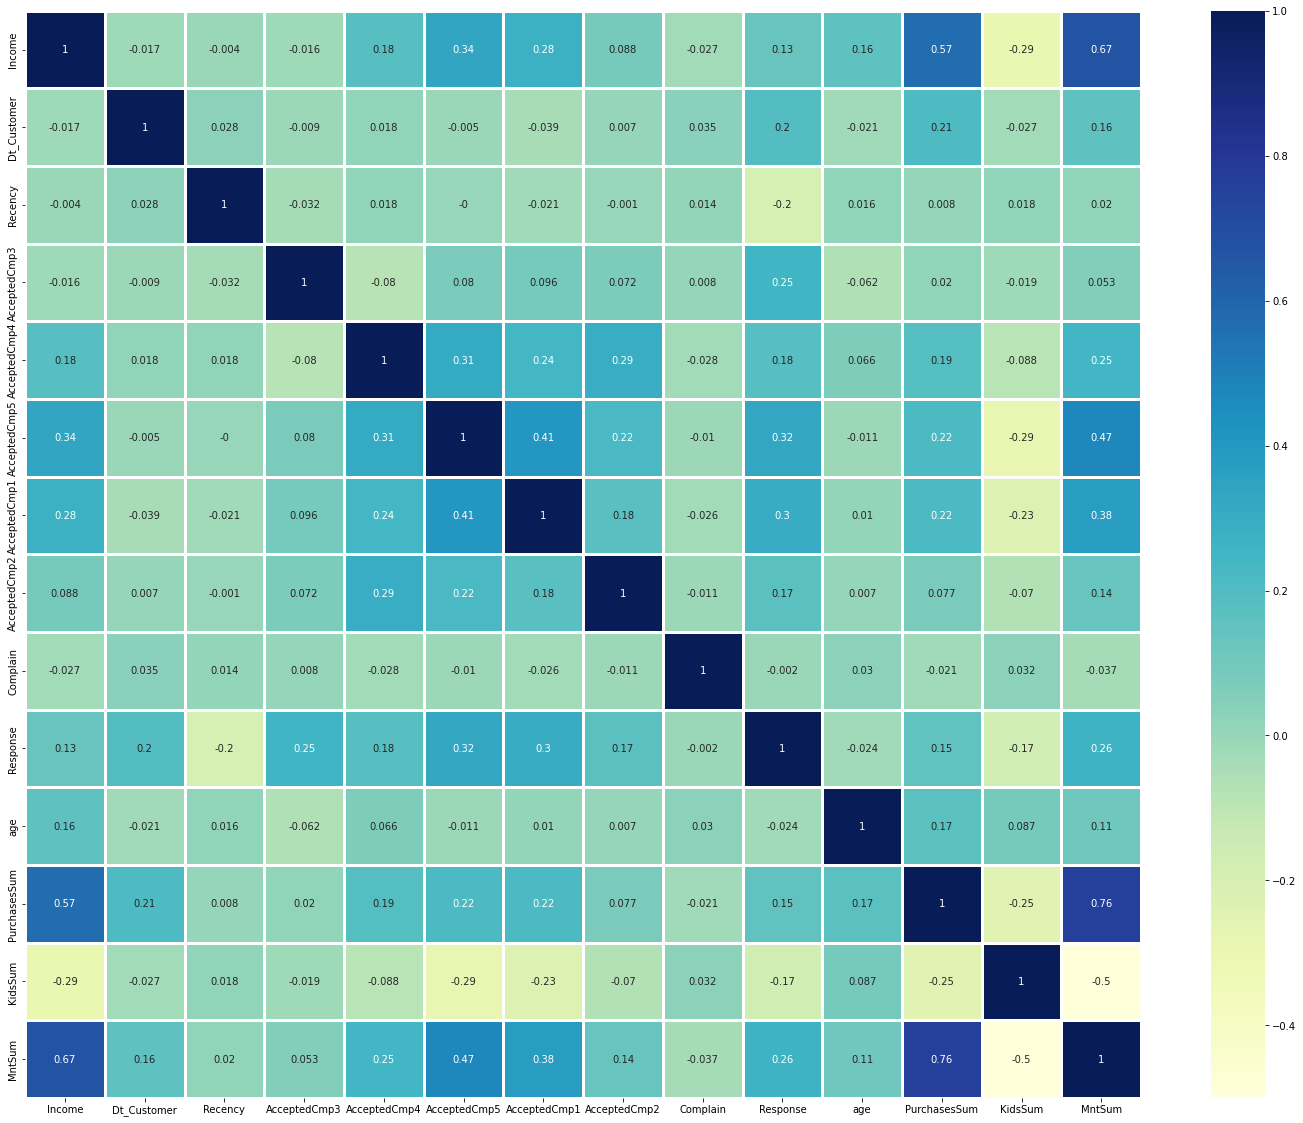

In [29]:
# Linear Correlations

corrmat = raw_data.corr().round(3)
fig, ax = plt.subplots(figsize = (25,20))
sns.heatmap(data = corrmat, annot=True, linewidths=3, cmap="YlGnBu");

## End of Feature Engineering

In [30]:
categorical_values = []

for item in raw_data.columns:
    if raw_data[item].dtype == 'object':
        categorical_values.append(item)

In [31]:
categorical_values

['Education', 'Marital_Status']

In [32]:
# Since there are not many categorical values, we do not apply categorical feature selection methods such as chi2, anova.

In [33]:
#One Hot Encoding

raw_data = pd.get_dummies(raw_data, columns = categorical_values)
raw_data

,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,...,PurchasesSum,KidsSum,MntSum,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Single,Marital_Status_Together
0,58138.0,116,58,0,0,0,0,0,0,1,...,25,0,1617,0,0,1,0,0,1,0
1,46344.0,97,38,0,0,0,0,0,0,0,...,6,2,27,0,0,1,0,0,1,0
2,71613.0,104,26,0,0,0,0,0,0,0,...,21,0,776,0,0,1,0,0,0,1
3,26646.0,98,26,0,0,0,0,0,0,0,...,8,1,53,0,0,1,0,0,0,1
4,58293.0,99,94,0,0,0,0,0,0,0,...,19,1,422,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,106,46,0,0,0,0,0,0,0,...,18,1,1341,0,0,1,0,0,0,1
2236,64014.0,94,56,0,0,0,1,0,0,0,...,22,3,444,0,0,0,0,1,0,1
2237,56981.0,99,91,0,1,0,0,0,0,0,...,19,0,1241,0,0,1,0,0,1,0
2238,69245.0,99,8,0,0,0,0,0,0,0,...,23,1,843,0,0,0,1,0,0,1


# Normalitity Check & Removal of Outliers

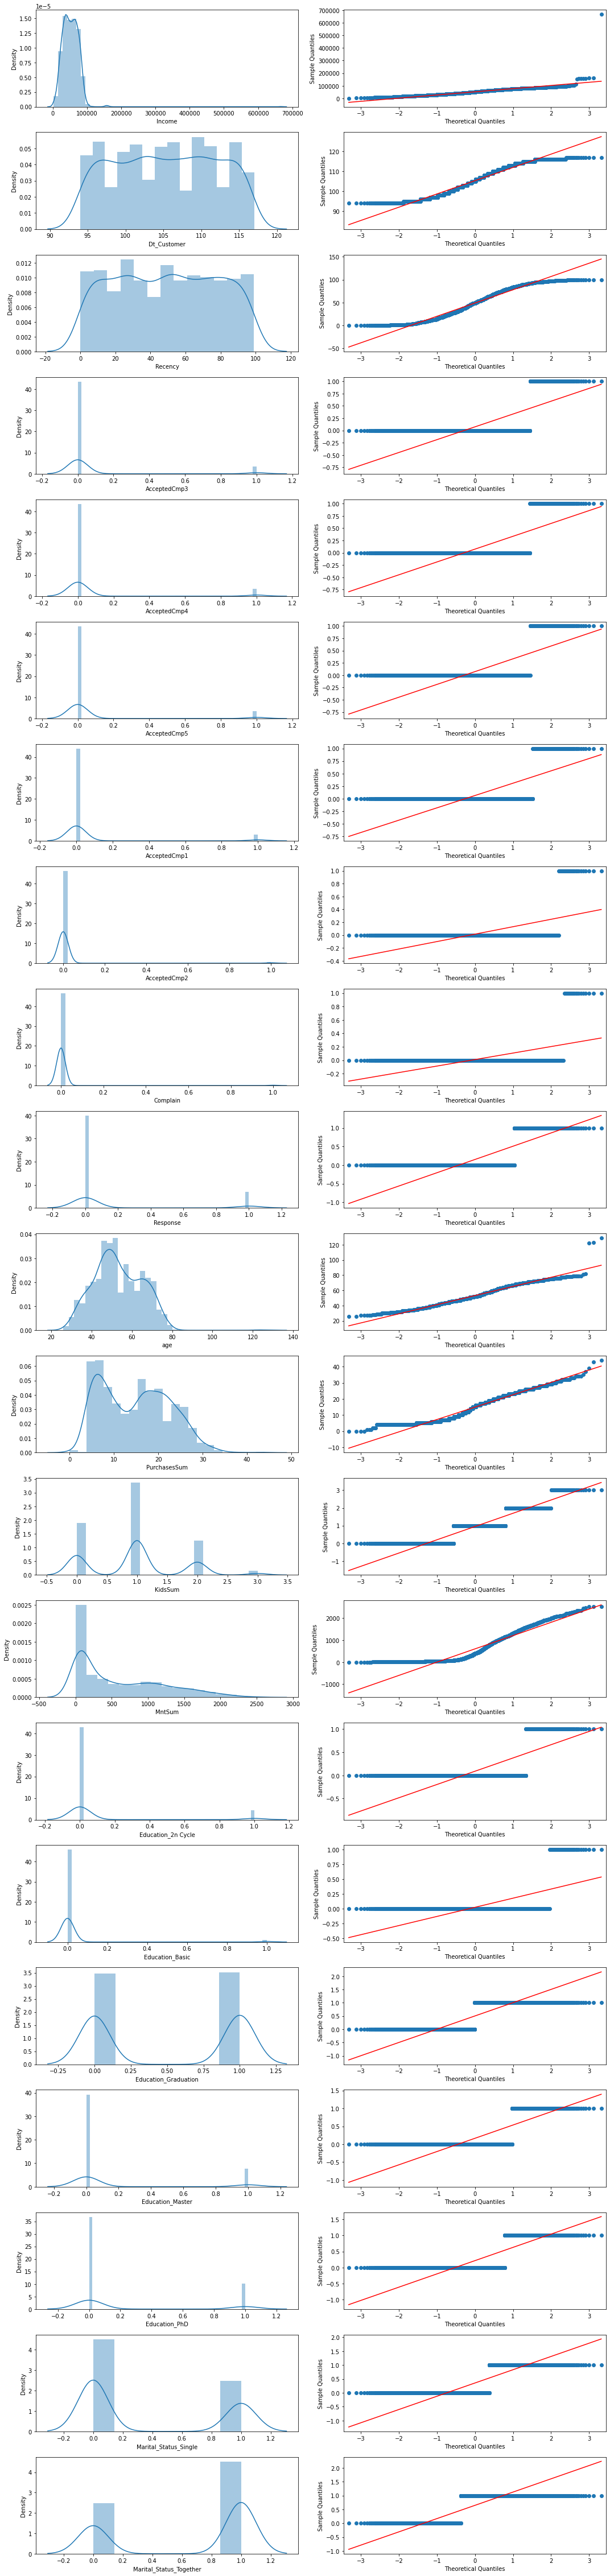

In [34]:
# Applying the visual normality tests for outlier detection
# Normal distribution --> use std dev to detect outliers
# Skewed distribution --> use IQR to detect outliers

def dist_pl(dist_data):
        
        from statsmodels.graphics.gofplots import qqplot

        fig, axes = plt.subplots(nrows = len(dist_data.columns), ncols = 2, figsize=(15,3*len(dist_data.columns)))

        for num, item in enumerate(dist_data.columns):
                sns.distplot(dist_data[item], ax = axes[num, 0], label = item)
                qqplot(dist_data[item], line ='s', ax = axes[num, 1]);
                
        fig.tight_layout()

dist_pl(raw_data)

In [35]:
# By looking distribution graphs, we can see 'age' and 'Income' columns has skewed distributions.
# We can apply IQR to these columns

raw_data[['age', 'Income']].describe()

,age,Income
count,2216.000000,2216.000000
mean,53.179603,52247.251354
std,11.985554,25173.076661
min,26.000000,1730.000000
25%,45.000000,35303.000000
50%,52.000000,51381.500000
75%,63.000000,68522.000000
max,129.000000,666666.000000


In [36]:
# Removal of Outliers in Income column

outlier_Income = raw_data['Income'].describe()

Q1_Income = outlier_Income[4]
Q3_Income = outlier_Income[6]
IQR_Income = Q3_Income - Q1_Income

low_Income_mean = Q1_Income - 1.5*IQR_Income
high_Income_mean = Q3_Income + 1.5*IQR_Income

raw_data = raw_data[(raw_data['Income'] >= low_Income_mean) & (raw_data['Income'] <= high_Income_mean)]

In [37]:
# Removal of Outliers in age column

outlier_age = raw_data['age'].describe()

Q1_age = outlier_age[4]
Q3_age = outlier_age[6]
IQR_age = Q3_age - Q1_age

low_age_mean = Q1_age - 1.5*IQR_age
high_age_mean = Q3_age + 1.5*IQR_age

raw_data = raw_data[(raw_data['age'] >= low_age_mean) & (raw_data['age'] <= high_age_mean)]

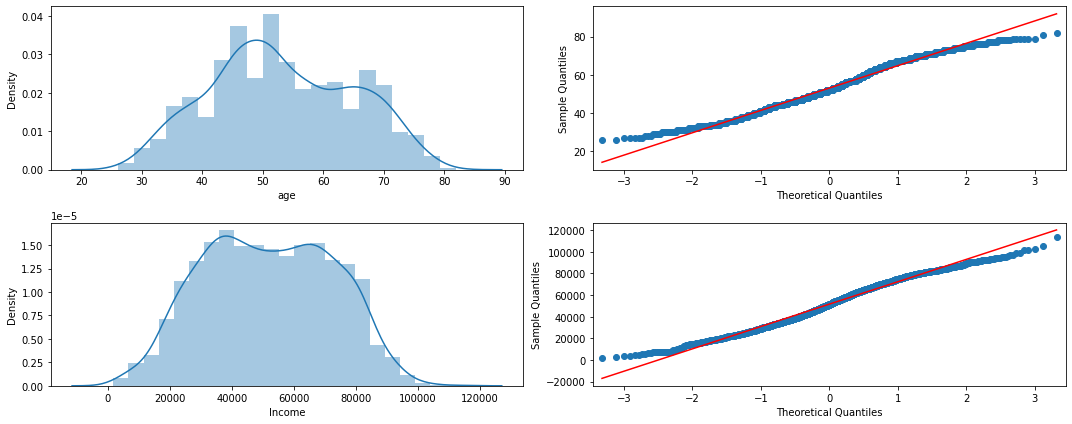

In [38]:
# Distributions after Outliers Dropped

dist_pl(raw_data[['age', 'Income']])

## End of Outlier Processes

In [39]:
# Creating DataFrame's of Xs and Ys

Xs_df = raw_data.drop(['Response'], axis = 1, inplace=False)
Ys_df = raw_data['Response'].to_frame()

In [40]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range = (1,2))
scaler2 = MinMaxScaler(feature_range = (1,2))
scaled_Xs = pd.DataFrame(scaler1.fit_transform(Xs_df), index=Xs_df.index, columns = Xs_df.columns) #columns belirtmezsek, sütun isimlerini silip 0-1-2 şeklinde numaralandırıyor.
scaled_Ys = pd.DataFrame(scaler2.fit_transform(Ys_df), index=Ys_df.index, columns = Ys_df.columns)

In [41]:
scaled_Ys.value_counts()

Response
1.0         1872
2.0          333
dtype: int64

# SMOTE

<AxesSubplot:xlabel='Response', ylabel='count'>

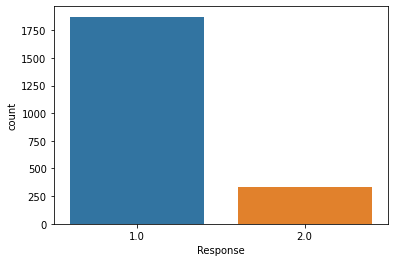

In [42]:
sns.countplot(scaled_Ys['Response'])

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# SMOTE and Feature/Target Split

sm = SMOTE(sampling_strategy = 'minority', random_state = 42, n_jobs = -1)

x_train, x_test, y_train, y_test = train_test_split(scaled_Xs, scaled_Ys, test_size=0.2, random_state=42, shuffle=True, stratify=scaled_Ys)

x_train, y_train = sm.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Response', ylabel='count'>

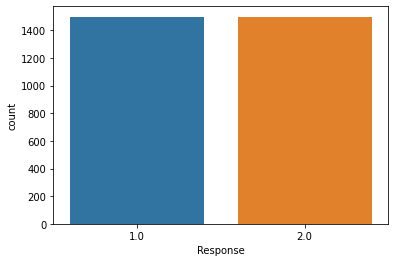

In [45]:
sns.countplot(y_train['Response'])

## End of SMOTE

In [46]:
y_train.value_counts()

Response
1.0         1498
2.0         1498
dtype: int64

In [47]:
y_test.value_counts()

Response
1.0         374
2.0          67
dtype: int64

In [48]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (2996, 20)
y_train:  (2996, 1)
x_test:  (441, 20)
y_test:  (441, 1)


# Functions

In [49]:
# Final Results DataFrame

model_results = pd.DataFrame(columns = ['Model_Name', 'Precision', 'Recall', 'F1_Score', 'Accuracy_Score', 'Log_Loss', 'True_Negative', 'False_Positive', 'False_Negative', 'True_Positive'])
model_results

,Model_Name,Precision,Recall,F1_Score,Accuracy_Score,Log_Loss,True_Negative,False_Positive,False_Negative,True_Positive


In [50]:
# Final Results DataFrame Messenger

def results_dataframe(modelname, tn, fp, fn, tp, final_score, logloss):

    '''
    Concatenating results of every models in a single dataframe
    '''

    global model_results
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = (2*precision*recall)/(precision+recall)

    model_df = {
        'Model_Name': [modelname],
        'Precision': [round(precision,2)],
        'Recall': [round(recall,2)],
        'F1_Score': [round(f1_score,2)],
        'Accuracy_Score': [round(final_score,2)],
        'Log_Loss': [('None' if logloss == None else round(logloss,2))],
        'True_Negative': [tn],
        'False_Positive': [fp],
        'False_Negative': [fn],
        'True_Positive': [tp]
    }

    model_df = pd.DataFrame(data = model_df, columns = ['Model_Name', 'Precision', 'Recall', 'F1_Score', 'Accuracy_Score', 'Log_Loss', 'True_Negative', 'False_Positive', 'False_Negative', 'True_Positive'])
    
    model_results = pd.concat([model_results, model_df], axis = 0, ignore_index=True) # ignore_index=True to set new index values. Otherwise all index values assigned as 0 in every concatenation.
    

In [51]:
def cumulative_model_results(modelname, model, x_train, y_train, x_test, y_test):

    '''
    Prediction Analytics of every model (Model Score, Log Loss, Classification Report, Confusion Matrix and Feature Importance)
    '''

    print(f'{modelname} Started...\n')
    model.fit(x_train, y_train)
    preds = model.predict(x_test)

    # # PREDICT PROBA #

    # try:
    #     preds = model.predict_proba(x_test)
    #     preds = np.array([2 if preds[:,1][i] >= 0.5 else 1 for i in range(len(preds[:,1]))])
    # except:
    #     preds = model.predict(x_test)
    #     pass

    # # END OF PREDICT PROBA #

    if modelname == 'NeuralNetwork':
        preds = np.array([2 if preds[i] >= 0.5 else 1 for i in range(len(preds))]) # We convert the probabilities to the categories which comply with MinMaxScaler range = [1,2]

    # print(y_test.value_counts())
    # print(type(preds))
    # print(type(y_test))
    # print(preds.shape)
    # print(y_test.shape)
    # print(len(preds))
    # print(len(y_test))
    # print(preds)
    # print(y_test)

    try:
        final_score = accuracy_score(y_test, preds)
        print(f'>{modelname} Model Score: {round(final_score*100, 2)}%\n')
    except:
        final_score = None
        pass

    try:
        logloss = log_loss(y_test, model.predict_proba(x_test)[:,1])
        print(f'Log Loss: {round(logloss*100, 2)}%\n')
        
    except:
        logloss = None
        print(f"{modelname} has no attribute 'predict_proba'. Since, no logloss.\n")
        pass

    print(classification_report(y_test, preds))

    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    ########################################################################

    # Precision = TruePositives / (TruePositives + FalsePositives)
    # Recall = TruePositives / (TruePositives + FalseNegatives)
    # F-Measure = (2 * Precision * Recall) / (Precision + Recall)

    # Precision: Appropriate when minimizing false positives is the focus.
    # Recall: Appropriate when minimizing false negatives is the focus.

    # In imbalanced datasets, the goal is to improve recall without hurting precision. 
    # These goals, however, are often conflicting, since in order to increase the TP for the minority class, 
    # the number of FP is also often increased, resulting in reduced precision.

    ########### IN ORDER TO PRINT TN, FP, FN, TP & CONFUSION MATRIX:

    # print(f'True Negative: {tn},\nFalse Positive: {fp},\nFalse Negative: {fn},\nTrue Positive {tp}')
    
    # cm = confusion_matrix(y_test, preds)
    # fig, ax = plt.subplots(figsize = (8,5))
    # sns.heatmap(data = cm, annot=True, fmt='g'); #fmt for formatting the display of values

    ########################################################################
    
    results_dataframe(modelname, tn, fp, fn, tp, final_score, logloss)

    try:
        print(
            pd.DataFrame({
                        'Variable':x_test.columns,
                        'Importance':model.feature_importances_
                        }).sort_values('Importance', ascending=False).head(20)
        )
    except:
        print(f'No Feature Importance.\n')
        pass

    print(f'{modelname} Finished.\n')

In [52]:
# Functions for Load/Save Model Hyperparameters From/To File

def save_best_params(dict, filename):
    with open(filename, 'w') as f:
        f.write(json.dumps(dict))
        
def save_best_score(score, filename):
    with open(filename, 'w') as f:
        f.write(str(score))
        
def load_best_params(filename):
    with open(filename) as f:
        loaded = json.loads(f.read())
    return loaded

def load_best_score(filename):
    with open(filename) as f:
        loaded = f.read()
    return loaded

# GridSearch

In [53]:
# # XGBClassifier

# xg_params = {
#         "max_depth": [None, 3, 10],
#         "learning_rate": [None, 0.05, 0.1],
#         "lambda": [None, 5, 10],
#         "n_estimators": [None, 1000, 1500]
#         }

# xgb1 = XGBClassifier(seed = 42)

# xg1_rgs = GridSearchCV(
#                 estimator=xgb1,
#                 param_grid=xg_params,
#                 scoring='f1',
#                 n_jobs = -1,
#                 cv = 5,
#                 verbose=0
#                 )

# xg1_rgs.fit(x_train, y_train)

# save_best_params(xg1_rgs.best_params_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/xgb_bestparams.json')
# save_best_score(-xg1_rgs.best_score_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/xgb_bestscore.txt')
# print(xg1_rgs.best_params_)
# print(-xg1_rgs.best_score_)

In [54]:
# #CatBoostClassifier

# cat_params = {
#         'n_estimators': [None, 500, 1000],
#         'learning_rate': [None, 0.05, 0.1],
#         'depth': [None, 8, 12],
#         'l2_leaf_reg': [None, 8, 12]
#         }

# catmodel = CatBoostClassifier(random_state = 42, logging_level = 'Silent')

# catgrid_search_result = catmodel.grid_search(
#                                         cat_params,
#                                         X = x_train,
#                                         y = y_train,
#                                         cv = 5,
#                                         verbose = False,
#                                         plot = True
#                                         )

# save_best_params(catgrid_search_result['params'], '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/catboost_bestparams.json')
# save_best_score(min(catgrid_search_result['cv_results']['test-Logloss-mean']), '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/catboost_bestscore.txt')
# print(catgrid_search_result['params'])
# print(min(catgrid_search_result['cv_results']['test-Logloss-mean']))

In [55]:
# # LGBMClassifier

# lgbm_params = {
#         'n_estimators': [None, 500, 1000],
#         'learning_rate': [None, 0.05, 0.15],
#         'max_depth': [None, 5, 10],
#         'reg_lambda': [None, 5, 10]
#         }

# lgbm1 = LGBMClassifier(random_state = 42)

# lgbm1_rgs = GridSearchCV(
#                 estimator=lgbm1,
#                 param_grid=lgbm_params,
#                 scoring='f1',
#                 n_jobs = -1,
#                 cv = 5,
#                 verbose=0
#                 )

# lgbm1_rgs.fit(x_train, y_train)

# save_best_params(lgbm1_rgs.best_params_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/lgbm_bestparams.json')
# save_best_score(-lgbm1_rgs.best_score_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/lgbm_bestscore.txt')
# print(lgbm1_rgs.best_params_)
# print(-lgbm1_rgs.best_score_)

In [56]:
# # AdaBoostClassifier

# ada_params = {
#         'n_estimators': [None, 500, 1000],
#         'learning_rate': [None, 0.05, 0.15],
#         'algorithm': [None, 'SAMME']
#         }

# ada1 = AdaBoostClassifier(random_state = 42)

# ada1_rgs = GridSearchCV(
#                 estimator=ada1,
#                 param_grid=ada_params,
#                 scoring='f1',
#                 n_jobs = -1,
#                 cv = 5,
#                 verbose=0
#                 )

# ada1_rgs.fit(x_train, y_train)

# save_best_params(ada1_rgs.best_params_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/ada_bestparams.json')
# save_best_score(-ada1_rgs.best_score_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/ada_bestscore.txt')
# print(ada1_rgs.best_params_)
# print(-ada1_rgs.best_score_)

In [57]:
# # RandomForestClassifier

# rf_params = {
#         "min_samples_split": [None, 10, 50],
#         "max_leaf_nodes": [None, 10],
#         "n_estimators": [None, 800, 1000, 1200],
#         "max_samples": [None, 0.5, 1.0]
# }

# randomforest = RandomForestClassifier(random_state = 42)

# rf_rgs = GridSearchCV(
#                 estimator=randomforest,
#                 param_grid=rf_params,
#                 scoring='f1',
#                 n_jobs = -1,
#                 cv = 5,
#                 verbose=0
#                 )

# rf_rgs.fit(x_train, y_train)

# save_best_params(rf_rgs.best_params_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/randomforest_bestparams.json')
# save_best_score(-rf_rgs.best_score_, '/Users/kemalburakariboga/Desktop/Python/Marketing_Campaign/hyperparams/randomforest_bestscore.txt')
# print(rf_rgs.best_params_)
# print(-rf_rgs.best_score_)


## End of GridSearch

# Model Trial & Error

In [58]:
# xg1_dict = load_best_params('hyperparams\xgb_bestparams.json') # Implementing most recent finetuning parameters
# xg1 = XGBClassifier(seed = 42, **xg1_dict)
# xg1.set_params(**xg1_dict)

# cat1_dict = load_best_params('hyperparams\catboost_bestparams.json') # Implementing most recent finetuning parameters
# cat1 = CatBoostClassifier(random_state = 42, logging_level = 'Silent', **cat1_dict)
# cat1.set_params(**cat1_dict)

# lgbm1_dict = load_best_params('hyperparams\lgbm_bestparams.json') # Implementing most recent finetuning parameters
# lgbm1 = LGBMClassifier(n_jobs=-1, random_state = 42, **lgbm1_dict)
# lgbm1.set_params(**lgbm1_dict)

# ada1_dict = load_best_params('hyperparams\ada_bestparams.json') # Implementing most recent finetuning parameters
# ada1 = AdaBoostClassifier(random_state = 42, **ada1_dict)
# ada1.set_params(**ada1_dict)

# rf1_dict = load_best_params('hyperparams\randomforest_bestparams.json') # Implementing most recent finetuning parameters
# rf1 = RandomForestClassifier(n_jobs=-1, random_state = 42, **rf1_dict)
# rf1.set_params(**rf1_dict)

In [59]:
model_dict = {}

# model_dict['XGBClassifier'] = xg1
# model_dict['CatBoostClassifier'] = cat1
# model_dict['LGBMClassifier'] = lgbm1
# model_dict['AdaBoostClassifier'] = ada1
# model_dict['RandomForestClassifier'] = rf1

model_dict['XGBClassifier'] = XGBClassifier(seed = 42)
model_dict['CatBoostClassifier'] = CatBoostClassifier(random_state = 42, logging_level = 'Silent')
model_dict['LGBMClassifier'] = LGBMClassifier(n_jobs=-1, random_state=42)
model_dict['AdaBoostClassifier'] = AdaBoostClassifier(random_state=42)
model_dict['RandomForestClassifier'] = RandomForestClassifier(n_jobs=-1, random_state=42)

model_dict['BaggingClassifier'] = BaggingClassifier(n_jobs=-1, random_state=42)
model_dict['ExtraTreesClassifier'] = ExtraTreesClassifier(n_jobs=-1, random_state=42)
model_dict['GradientBoostingClassifier'] = GradientBoostingClassifier(random_state=42)
model_dict['MLPClassifier'] = MLPClassifier(random_state=42)
model_dict['RidgeClassifier'] = RidgeClassifier(random_state=42)
model_dict['KNeighborsClassifier'] = KNeighborsClassifier()
model_dict['ComplementNB'] = ComplementNB()
model_dict['MultinomialNB'] = MultinomialNB()
model_dict['GaussianNB'] = GaussianNB()
model_dict['LogisticRegression'] = LogisticRegression(random_state = 42)
model_dict['SVC'] = SVC(random_state = 42)
model_dict['LinearSVC'] = LinearSVC(random_state = 42)
model_dict['NuSVC'] = NuSVC(random_state = 42)
model_dict['DecisionTreeClassifier'] = DecisionTreeClassifier(random_state = 42)
model_dict['BaggingClassifier_with_DecisionTreeClassifier'] = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_jobs = -1, random_state = 42)
model_dict['AdaBoostClassifier_with_DecisionTreeClassifier'] = AdaBoostClassifier(DecisionTreeClassifier(random_state = 42), random_state = 42)

# The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a 
# majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a 
# set of equally well performing model in order to balance out their individual weaknesses.

model_dict['VotingClassifier'] = VotingClassifier(
                                                estimators = [
                                                                ('XGBClassifier', XGBClassifier(seed = 42)),
                                                                ('CatBoostClassifier', CatBoostClassifier(random_state = 42, logging_level = 'Silent')),
                                                                ('LGBMClassifier', LGBMClassifier(n_jobs=-1, random_state=42)),
                                                                ('SVC', SVC(random_state = 42)),
                                                                ('GaussianNB', GaussianNB()),
                                                                ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                                                                ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
                                                                ('MLPClassifier', MLPClassifier(random_state=42)),
                                                            ],
                                                n_jobs = -1,
                                                )

In [60]:
# For every model, we are trying to get Model Score, Log Loss, Classification Report and Feature Importance
# Also we aggregate the result of every models in 'model_results' dataframe

for key, value in model_dict.items():
    cumulative_model_results(key, value, x_train, y_train, x_test, y_test)

XGBClassifier Started...

[00:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>XGBClassifier Model Score: 87.07%

Log Loss: 36.89%

              precision    recall  f1-score   support

         1.0       0.92      0.93      0.92       374
         2.0       0.58      0.55      0.56        67

    accuracy                           0.87       441
   macro avg       0.75      0.74      0.74       441
weighted avg       0.87      0.87      0.87       441

                   Variable  Importance
5              AcceptedCmp5    0.200094
6              AcceptedCmp1    0.108255
11                  KidsSum    0.106070
3              AcceptedCmp3    0.097183
7              AcceptedCmp2    0.063081
1               Dt_Customer    0.053291
17            Education_PhD  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Inde

[00:14:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>VotingClassifier Model Score: 88.66%

VotingClassifier has no attribute 'predict_proba'. Since, no logloss.

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.93       374
         2.0       0.63      0.61      0.62        67

    accuracy                           0.89       441
   macro avg       0.78      0.77      0.78       441
weighted avg       0.89      0.89      0.89       441

No Feature Importance.

VotingClassifier Finished.



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
# Outputting Model Results by F1_Score sorting.

model_results.sort_values(by=['F1_Score'], ascending=False)

,Model_Name,Precision,Recall,F1_Score,Accuracy_Score,Log_Loss,True_Negative,False_Positive,False_Negative,True_Positive
21,VotingClassifier,0.63,0.61,0.62,0.89,None,350,24,26,41
2,LGBMClassifier,0.64,0.58,0.61,0.89,0.3,352,22,28,39
7,GradientBoostingClassifier,0.59,0.64,0.61,0.88,0.31,344,30,24,43
8,MLPClassifier,0.48,0.75,0.58,0.84,0.38,320,54,17,50
19,BaggingClassifier_with_DecisionTreeClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
4,RandomForestClassifier,0.57,0.58,0.57,0.87,0.37,344,30,28,39
5,BaggingClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
14,LogisticRegression,0.46,0.75,0.57,0.83,0.4,315,59,17,50
1,CatBoostClassifier,0.58,0.55,0.56,0.87,0.29,347,27,30,37
17,NuSVC,0.44,0.75,0.56,0.82,None,311,63,17,50


## End of Blackbox Models

# Stacking

MODELS - CROSS VALIDATED TRAINING SET PREDICTIONS - 

In [62]:

def train_set_crossvalidation_results(modelname, model, raw_x_train = x_train , raw_y_train = y_train , raw_x_test = x_test, raw_y_test = y_test, cv_1 = 5):

        '''
        Returns train set predictions made by crossvalidation, and their true values (y_train).
        '''

        predictions = pd.DataFrame()

        kfold = KFold(n_splits=cv_1, random_state=None, shuffle=False)

        for train_ix, test_ix in kfold.split(raw_x_train, raw_y_train):
                
                xtrain, xtest = raw_x_train.iloc[train_ix], raw_x_train.iloc[test_ix]
                ytrain, ytest = raw_y_train.iloc[train_ix], raw_y_train.iloc[test_ix]

                model.fit(xtrain, ytrain)
                
                pred = model.predict(xtest)

                pred = pd.DataFrame(data = pred, columns = [f'{modelname}_predictions'], index = xtest.index)

                predictions = pd.concat([predictions, pred], axis=0)

        predictions = predictions.sort_index()

        return predictions, raw_y_train


def x_test_predictions_for_meta_learner(modelname, model, raw_x_train = x_train , raw_y_train = y_train , raw_x_test = x_test, raw_y_test = y_test):

        '''
        Returns test set predictions, and their true values (y_test).
        '''

        predictions = pd.DataFrame()

        model.fit(raw_x_train, raw_y_train)

        pred = model.predict(raw_x_test)

        pred = pd.DataFrame(data = pred, columns = [f'{modelname}_predictions'], index = raw_x_test.index)

        predictions = pd.concat([predictions, pred], axis=0)

        return predictions, raw_y_test


In [63]:
stacking_model_dict = {}

stacking_model_dict['CatBoostClassifier'] = CatBoostClassifier(random_state = 42, logging_level = 'Silent')
stacking_model_dict['LGBMClassifier'] = LGBMClassifier(n_jobs=-1, random_state=42)
stacking_model_dict['ExtraTreesClassifier'] = ExtraTreesClassifier(n_jobs=-1, random_state=42)
stacking_model_dict['SVC'] = SVC(random_state = 42)
stacking_model_dict['GaussianNB'] = GaussianNB()
stacking_model_dict['MLPClassifier'] = MLPClassifier(random_state=42)
stacking_model_dict['GradientBoostingClassifier'] = GradientBoostingClassifier(random_state=42)
stacking_model_dict['VotingClassifier'] = VotingClassifier(
                                                estimators = [
                                                                ('XGBClassifier', XGBClassifier(seed = 42)),
                                                                ('CatBoostClassifier', CatBoostClassifier(random_state = 42, logging_level = 'Silent')),
                                                                ('LGBMClassifier', LGBMClassifier(n_jobs=-1, random_state=42)),
                                                                ('SVC', SVC(random_state = 42)),
                                                                ('GaussianNB', GaussianNB()),
                                                                ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                                                                ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
                                                                ('MLPClassifier', MLPClassifier(random_state=42)),
                                                            ],
                                                n_jobs = -1,
                                                )

In [64]:
train_set_predictions = {}
train_set_true_values = {}
test_set_predictions = {}
test_set_true_values = {}

for key, value in stacking_model_dict.items():

    # Returns train set predictions made by crossvalidation, and their true values (y_train).
    train_set_predictions[f'{key}_train_predictions'], train_set_true_values[f'{key}_train_true_values'] = train_set_crossvalidation_results(modelname = f'{key}_cv_train_set', model = value)
    
    # Returns test set predictions, and their true values (y_test).
    test_set_predictions[f'{key}_test_predictions'], test_set_true_values[f'{key}_test_true_values'] = x_test_predictions_for_meta_learner(modelname = f'{key}_test_set', model = value)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Inde

[00:14:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Inde

[00:14:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warni

[00:14:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[00:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warni

[00:14:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warni

[00:15:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
meta_train_x = pd.DataFrame()

'''
The train set predictions of different models are concatenated in a dataframe called meta_train_x
'''

for key, value in train_set_predictions.items():
    meta_train_x = pd.concat([meta_train_x, value], axis = 1)

meta_train_y = list(train_set_true_values.values())[0] # We just choose one of the y_train values since all values are identical in train_set_true_values dictionary 

In [66]:
meta_test_x = pd.DataFrame()

'''
The test set predictions of different models are concatenated in a dataframe called meta_test_x
'''

for key, value in test_set_predictions.items():
    meta_test_x = pd.concat([meta_test_x, value], axis = 1)

meta_test_y = list(test_set_true_values.values())[0] # We just choose one of the y_test values since all values are identical in test_set_true_values dictionary 

In [67]:
meta_model_name = 'Stacking'
meta_model = LogisticRegression(n_jobs = -1)

In [68]:
cumulative_model_results(meta_model_name, meta_model, meta_train_x, meta_train_y, meta_test_x, meta_test_y)

Stacking Started...

>Stacking Model Score: 87.53%

Log Loss: 39.96%

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       374
         2.0       0.62      0.46      0.53        67

    accuracy                           0.88       441
   macro avg       0.76      0.71      0.73       441
weighted avg       0.86      0.88      0.87       441

No Feature Importance.

Stacking Finished.



In [69]:
model_results.sort_values(by=['F1_Score'], ascending=False)

,Model_Name,Precision,Recall,F1_Score,Accuracy_Score,Log_Loss,True_Negative,False_Positive,False_Negative,True_Positive
21,VotingClassifier,0.63,0.61,0.62,0.89,None,350,24,26,41
2,LGBMClassifier,0.64,0.58,0.61,0.89,0.3,352,22,28,39
7,GradientBoostingClassifier,0.59,0.64,0.61,0.88,0.31,344,30,24,43
8,MLPClassifier,0.48,0.75,0.58,0.84,0.38,320,54,17,50
14,LogisticRegression,0.46,0.75,0.57,0.83,0.4,315,59,17,50
4,RandomForestClassifier,0.57,0.58,0.57,0.87,0.37,344,30,28,39
5,BaggingClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
19,BaggingClassifier_with_DecisionTreeClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
0,XGBClassifier,0.58,0.55,0.56,0.87,0.37,347,27,30,37
1,CatBoostClassifier,0.58,0.55,0.56,0.87,0.29,347,27,30,37


## End of Stacking

# Neural Network

In [70]:
x_train.shape

(2996, 20)

In [71]:
nnmodel = keras.models.Sequential()
nnmodel.add(keras.Input(shape=(x_train.shape[1],)))
nnmodel.add(keras.layers.Dense(units = 15, kernel_regularizer = keras.regularizers.l1(0.01), activation = 'relu', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
# nnmodel.add(keras.layers.Dropout(0.5))
nnmodel.add(keras.layers.Dense(units = 15, kernel_regularizer = keras.regularizers.l2(0.01), activation = 'relu'))
# nnmodel.add(keras.layers.Dropout(0.5))
nnmodel.add(keras.layers.Dense(units = 15, kernel_regularizer = keras.regularizers.l2(0.01), activation = 'relu'))
# nnmodel.add(keras.layers.Dropout(0.5))
nnmodel.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

2022-05-06 00:15:02.827658: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [72]:
opt = keras.optimizers.Adam(learning_rate=0.000001)
nnmodel.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
nnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                315       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [74]:
hist = nnmodel.fit(x_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.1282 - accuracy: 0.0284
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1276 - accuracy: 0.0320
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1271 - accuracy: 0.0397
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1266 - accuracy: 0.0511
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1261 - accuracy: 0.0631
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1255 - accuracy: 0.0744
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1250 - accuracy: 0.0908
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1244 - accuracy: 0.1078
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1238 - accuracy: 0.1138
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1232 - accuracy: 0.1195
Epoch 11/

In [75]:
nnmodel.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 1.0747 - accuracy: 0.7528


[1.07465398311615, 0.7528344392776489]

In [76]:
cumulative_model_results('NeuralNetwork', nnmodel, x_train, y_train, x_test, y_test)

NeuralNetwork Started...

94/94 [==============================] - 0s 1ms/step - loss: 1.0520 - accuracy: 0.4499
>NeuralNetwork Model Score: 22.45%

NeuralNetwork has no attribute 'predict_proba'. Since, no logloss.

              precision    recall  f1-score   support

         1.0       0.92      0.09      0.17       374
         2.0       0.16      0.96      0.27        67

    accuracy                           0.22       441
   macro avg       0.54      0.52      0.22       441
weighted avg       0.81      0.22      0.19       441

No Feature Importance.

NeuralNetwork Finished.



In [77]:
model_results.sort_values(by=['F1_Score'], ascending=False)

,Model_Name,Precision,Recall,F1_Score,Accuracy_Score,Log_Loss,True_Negative,False_Positive,False_Negative,True_Positive
21,VotingClassifier,0.63,0.61,0.62,0.89,None,350,24,26,41
2,LGBMClassifier,0.64,0.58,0.61,0.89,0.3,352,22,28,39
7,GradientBoostingClassifier,0.59,0.64,0.61,0.88,0.31,344,30,24,43
8,MLPClassifier,0.48,0.75,0.58,0.84,0.38,320,54,17,50
4,RandomForestClassifier,0.57,0.58,0.57,0.87,0.37,344,30,28,39
5,BaggingClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
14,LogisticRegression,0.46,0.75,0.57,0.83,0.4,315,59,17,50
19,BaggingClassifier_with_DecisionTreeClassifier,0.53,0.61,0.57,0.86,0.75,337,37,26,41
0,XGBClassifier,0.58,0.55,0.56,0.87,0.37,347,27,30,37
17,NuSVC,0.44,0.75,0.56,0.82,None,311,63,17,50


# End of notebook

# Final Comments

#### What else can we do?

#### Technical:

- Clustering and similarity
- Visualizing the XGBoost, RandomForest, etc. trees and try to define the hyperparameters manually
- Visualization: Pandas HTML Profiling

#### Comments:

- If we interpret model results, it can be said that the models got stuck at a level while improving the f1 score.
- Due to the nature of the marketing sector, there are many user segments. While one person is willing to accept an offer, another may not want to use that campaign. 
- A better generalization can be made by collecting more data about target user segmentation.
- Some articles state that wealthy people do not care about discounts but experience. If the product is a luxury perfume, an elegant necklace will complement it better than a discount. However, when buying a protective cover for the phone, everyone wants to buy it at the best price.
- Some articles also provide user segmentation techniques like RFM (recency, frequency, monetary) and LTV/CLV (Customer Lifetime Value). I heard them first time while doing research. Therefore no implementation was carried out due to lack of time.
- Collaborating with the business development team can improve customer loyalty by creating targeted campaigns. For example:
-   - Medium/high income range (62% between 45,000 USD - 90,000 USD), with an average of 60,000 USD. 
-   - 8% have income higher than 90,000 USD.
-   - High education level. About 93% have at least a graduation. 30% have a PhD.
-   - 32% are single and 40% are married/together with at most one kid/teen
-   - 66% are young adult or middle-aged (generation X and Y)

#### Income Segments - While not targeted customers are more equally distributed () (30,000 USD - 75,000 USD) by their income, target customers are dominant in range 75,000 USD - 90,000 USD

![Income_Segments](Income_Segments.png "Income_Segments")

#### Age Groups - People aged 42-57 is the most frequent in general. However target has a greater presence of people aged 26-41

![Age_Segments](Age_Segments.png "Age_Segments")

#### Marital Status - Customers who have a partner are the most frequent customer segmentation but target customers mainly comprise of single ones.

![Marital_Status](Marital_Status.png "Marital_Status")